# 1- Imports

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append(os.path.abspath("../src"))
from data_processing import *




pd.options.display.max_columns = None
pd.options.display.max_info_rows = 40

# 2- Load data

In [49]:
df_fifa22 = pd.read_csv("../data/raw/players_22.csv")
df_stats= pd.read_csv("../data/raw/All_stats_2022_id.csv")

# 3 Processing data

In [50]:
# Renombrar columnas
df_stats.rename(columns={"Apps_x":"apariciones",
                 "Mins_x":"min_jugados",
                 "ns_x":"edad",
                 "SpG":"tirosXp",
                 "KeyP":"pasesXp",
                 "Drb":"regatesXp",
                 "Fouled":"faltadoXp",
                 "Off":"fuerajuegoXp",
                 "Disp":"robadoXp",
                 "UnsTch":"malcontroXp",
                 "Rating_x":"rating",
                 "Año_x":"año",
                 "Liga_x":"liga",
                 "num_x":"num",
                 "equipo_x":"equipo",
                 "posicion_x":"posicion",
                 "xG":"goles_esperados",
                 "Shots":"total_disparos",
                 "Goals_x":"goles",
                 }, inplace=True)

In [51]:
no_cols = ["Player_x","Player_y","Apps_y","Mins_y","Año_y","num_y","equipo_y","ns_y","posicion_y","Liga_y","Goals_y",'Rating_y',"num"]

In [52]:
# Eliminar col sobrantes
df_stats.drop(no_cols,axis=1,inplace=True)
df_stats.drop_duplicates(subset='nom_jugad',keep='first',inplace=True)

In [53]:
# df_stats[df_stats[""]]
# df_stats[df_stats["xG/90"].isna()]
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3190 entries, 0 to 3485
Data columns (total 24 columns):
 #   Column           Dtype  
---  ------           -----  
 0   apariciones      object 
 1   min_jugados      int64  
 2   goles            object 
 3   Assists          object 
 4   tirosXp          object 
 5   pasesXp          object 
 6   regatesXp        object 
 7   faltadoXp        object 
 8   fuerajuegoXp     object 
 9   robadoXp         object 
 10  malcontroXp      object 
 11  rating           float64
 12  año              int64  
 13  liga             object 
 14  nom_jugad        object 
 15  equipo           object 
 16  edad             int64  
 17  posicion         object 
 18  goles_esperados  float64
 19  xGDiff           object 
 20  xG/90            object 
 21  total_disparos   float64
 22  xG/Shots         float64
 23  id_fifa          int64  
dtypes: float64(4), int64(4), object(16)
memory usage: 623.0+ KB


In [54]:
df_stats['apariciones_totales'] = df_stats['apariciones'].apply(procesar_valor)
df_stats.drop("apariciones",axis=1,inplace=True)

In [55]:
df_stats = df_stats[['id_fifa','nom_jugad','posicion','equipo','liga','año','edad',
                     'apariciones_totales', 'min_jugados', 'tirosXp',
                     'pasesXp', 'regatesXp', 'faltadoXp', 'fuerajuegoXp', 'robadoXp',
                     'malcontroXp', 'goles_esperados', 'xGDiff', 'xG/90',
                     'total_disparos', 'xG/Shots','rating','goles']]

In [56]:
df_stats.replace('-',0,inplace=True);

In [57]:
df_stats[['goles_esperados', 'xGDiff', 'xG/90','total_disparos', 'xG/Shots','rating']] = df_stats[['goles_esperados', 'xGDiff', 'xG/90','total_disparos', 'xG/Shots','rating']].fillna(0)

In [58]:
df_stats = df_stats.astype({"tirosXp":float,
                            "pasesXp":float,
                            "regatesXp":float,
                            "faltadoXp":float,
                            "fuerajuegoXp":float,
                            "robadoXp":float,
                            "malcontroXp":float,
                            "goles_esperados":float,
                            "xGDiff":float,
                            "xG/90":float,
                            "total_disparos":int,
                            "goles":int,
                            })

In [59]:
pd.set_option('display.max_rows', 100)
counts = df_stats['posicion'].value_counts()
counts

posicion
D(C)               322
DMC                210
FW                 209
GK                 197
M(C)               168
Forward            166
Midfielder         139
AM(CLR),FW         121
Defender           116
D(L),M(L)           92
M(CLR),FW           75
D(R),M(R)           68
M(CLR)              67
D(CL)               60
D(C),DMC            60
D(CR)               59
AM(C)               49
D(L)                49
AM(CLR)             47
AM(R)               45
AM(LR)              42
AM(L),FW            42
D(R)                41
D(CL),M(L)          40
AM(LR),FW           38
M(CL)               37
AM(C),FW            33
AM(CR),FW           32
M(CR)               32
AM(CR)              32
AM(L)               31
AM(CL),FW           30
D(CR),M(R)          27
D(LR),M(R)          26
AM(CL)              25
M(LR)               22
D(CR),DMC           22
D(CLR),M(R)         20
AM(R),FW            16
D(CLR)              16
D(R),M(CR)          14
D(L),M(LR)          13
D(R),M(LR)          13
D(

In [60]:
agrupacion_posiciones = {
    'D(C)': 'Defensor', 'DMC': 'Defensor', 'Defender': 'Defensor', 'D(L)': 'Defensor', 'D(R)': 'Defensor', 
    'D(CL)': 'Defensor', 'D(CR)': 'Defensor', 'D(LR)': 'Defensor', 'D(CLR)': 'Defensor', 'D(L),M(L)': 'Centrocampista',
    'D(R),M(R)': 'Centrocampista', "D(C),DMC": 'Centrocampista', 'M(C)': 'Centrocampista', 'M(CLR)': 'Centrocampista',
    'M(CL)': 'Centrocampista', 'M(CR)': 'Centrocampista', 'M(LR)': 'Centrocampista', 'M(R)': 'Centrocampista', 
    'M(L)': 'Centrocampista', 'AM(CLR),FW': 'Delantero', 'AM(CR),FW': 'Delantero', 'AM(L),FW': 'Delantero', 
    'AM(C),FW': 'Delantero', 'AM(CL),FW': 'Delantero', 'M(CR),FW': 'Delantero', 'FW': 'Delantero', 
    'Forward': 'Delantero', 
    'GK': 'Portero', 'Goalkeeper': 'Portero', 
    # Añadir todas las combinaciones de centrocampistas que mencionaste:
    'AM(C)': 'Centrocampista', 'AM(CLR)': 'Centrocampista', 'AM(R)': 'Centrocampista', 'AM(LR)': 'Centrocampista', 
    'AM(CLR)': 'Centrocampista', 'AM(L)': 'Centrocampista', 'D(CR),M(R)': 'Centrocampista', 
    'D(LR),M(R)': 'Centrocampista', 'AM(CL)': 'Centrocampista', 'D(CR),DMC': 'Centrocampista',
    'D(CLR),M(R)': 'Centrocampista', 'D(R),M(CR)': 'Centrocampista', 'D(L),M(LR)': 'Centrocampista',
    'D(R),M(LR)': 'Centrocampista', 'D(C),M(C)': 'Centrocampista', 'D(LR),M(LR)': 'Centrocampista',
    'D(CLR),M(LR)': 'Centrocampista', 'D(L),M(CL)': 'Centrocampista', 'D(R),M(CLR)': 'Centrocampista',
    'D(LR),M(CLR)': 'Centrocampista', 'D(LR),M(CR)': 'Centrocampista', 'D(LR),M(L)': 'Centrocampista',
    'D(CR),M(LR)': 'Centrocampista', 'D(CR),M(C)': 'Centrocampista', 'D(R),M(C)': 'Centrocampista', 
    'D(LR),M(C)': 'Centrocampista', 'D(LR),M(CR)': 'Centrocampista', 'D(CLR),M(R)': 'Centrocampista',
    'Midfielder': 'Centrocampista', 'D(CL),M(L)': 'Centrocampista', 'AM(CR)': 'Centrocampista',
    'D(CL),DMC': 'Centrocampista', 'D(L),M(CLR)': 'Centrocampista', 'D(CR),DMC,M(R)': 'Centrocampista',
    'D(L),DMC': 'Centrocampista', 'D(CLR),DMC': 'Centrocampista', 'D(R),DMC': 'Centrocampista',
    # Nuevas combinaciones añadidas:
    'D(R),DMC,M(R)': 'Centrocampista', 'D(LR),M(CL)': 'Centrocampista', 'D(L),DMC,M(L)': 'Centrocampista',
    'DMC,M(L)': 'Centrocampista', 'D(CL),M(CLR)': 'Centrocampista', 'D(C),M(CLR)': 'Centrocampista', 
    'D(C),M(CL)': 'Centrocampista', 'D(CL),DMC,M(L)': 'Centrocampista', 'D(CL),M(CL)': 'Centrocampista',
    'DMC,M(R)': 'Centrocampista', 'D(CL),M(LR)': 'Centrocampista', 'D(CLR),DMC,M(R)': 'Centrocampista',
    'D(CR),M(CR)': 'Centrocampista', 'D(L),M(R)': 'Centrocampista', 'D(L),M(C)': 'Centrocampista',
    'D(LR),DMC': 'Centrocampista', 'D(LR),DMC,M(LR)': 'Centrocampista'
}


# Reemplazar combinaciones que incluyan "FW" con "Delantero"
for posicion in df_stats['posicion']:
    if 'FW' in posicion:  # Si "FW" está presente en la posición
        df_stats.loc[df_stats['posicion'] == posicion, 'grupo_posicion'] = 'Delantero'
    else:
        df_stats.loc[df_stats['posicion'] == posicion, 'grupo_posicion'] = agrupacion_posiciones.get(posicion, 'Desconocido')

df_stats.drop("posicion",axis=1,inplace=True)

In [61]:
df_stats["grupo_posicion"].value_counts()

grupo_posicion
Centrocampista    1290
Defensor           880
Delantero          812
Portero            208
Name: count, dtype: int64

In [62]:
mapeo_posiciones = {
    'Desconocido': 0,  # Si hay valores desconocidos
    'Portero': 0,
    'Defensor': 2,
    'Centrocampista': 5,
    'Delantero': 10,
}

# Aplicar el mapeo a la columna 'grupo_posicion'
df_stats['num_pos'] = df_stats['grupo_posicion'].map(mapeo_posiciones)

In [63]:
df_stats.drop("grupo_posicion",axis=1,inplace=True)

# Apartado Fifa

In [69]:
pd.set_option('display.max_columns', None)


In [123]:
df_fifa22= df_fifa22.dropna(subset=["shooting"])
df_fifa22= df_fifa22.dropna(subset=["value_eur"])

In [124]:
desired_cols = ["id_fifa","rating","tirosXp","goles_esperados","goles"]
df_stats_filtered = df_stats[desired_cols]
df_stats_fifa = pd.merge(df_stats_filtered,df_fifa22,on="id_fifa",how='left')

In [125]:
df_stats_fifa = df_stats_fifa.dropna(subset=["short_name"])


In [126]:
desired_cols = ["short_name","id_fifa","rating","tirosXp","goles_esperados","value_eur","shooting","pace","attacking_crossing","attacking_finishing","attacking_heading_accuracy","attacking_volleys","skill_dribbling","skill_curve","skill_fk_accuracy","skill_ball_control","movement_acceleration","movement_sprint_speed","movement_agility","power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots","mentality_aggression","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure","goles"]
df_stats_fifa = df_stats_fifa[desired_cols]
df_stats_fifa.head()

,short_name,id_fifa,rating,tirosXp,goles_esperados,value_eur,shooting,pace,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goles
0,Aarón,236295,6.00,0.0,0.00,5500000.0,47.0,64.0,78.0,36.0,63.0,40.0,73.0,76.0,51.0,75.0,72.0,57.0,76.0,64.0,61.0,76.0,60.0,55.0,59.0,59.0,61.0,46.0,72.0,0
1,A. Cresswell,189615,6.08,0.3,0.04,12500000.0,60.0,70.0,83.0,54.0,68.0,48.0,76.0,80.0,73.0,77.0,73.0,67.0,73.0,71.0,86.0,74.0,61.0,66.0,73.0,60.0,68.0,59.0,72.0,0
2,A. Meijers,188621,6.06,0.3,0.11,525000.0,55.0,64.0,63.0,47.0,62.0,58.0,68.0,71.0,69.0,66.0,65.0,64.0,68.0,67.0,80.0,71.0,69.0,60.0,71.0,64.0,66.0,56.0,70.0,0
4,A. Wan-Bissaka,229880,6.82,0.3,0.08,48500000.0,52.0,85.0,73.0,46.0,51.0,43.0,80.0,74.0,45.0,76.0,82.0,88.0,84.0,70.0,67.0,81.0,72.0,46.0,78.0,70.0,66.0,44.0,76.0,0
5,Aarón,236295,6.27,0.0,0.00,5500000.0,47.0,64.0,78.0,36.0,63.0,40.0,73.0,76.0,51.0,75.0,72.0,57.0,76.0,64.0,61.0,76.0,60.0,55.0,59.0,59.0,61.0,46.0,72.0,0


In [127]:
df_stats_fifa = df_stats_fifa.astype({
                            "value_eur":int,
                            "shooting":int,
                            "pace":int,
                            "attacking_crossing":int,
                            "attacking_finishing":int,
                            "attacking_heading_accuracy":int,
                            "attacking_volleys":int,
                            "skill_dribbling":int,
                            "skill_curve":int,
                            "skill_fk_accuracy":int,
                            "skill_ball_control":int,
                            "movement_acceleration":int,
                            "movement_sprint_speed":int,
                            "movement_agility":int,
                            "power_shot_power":int,
                            "power_jumping":int,
                            "power_strength":int,
                            "power_long_shots":int,
                            "mentality_aggression":int,
                            "mentality_positioning":int,
                            "mentality_vision":int,
                            "mentality_penalties":int,
                            "mentality_composure":int,
                            })

In [128]:
df_stats_fifa.head()

,short_name,id_fifa,rating,tirosXp,goles_esperados,value_eur,shooting,pace,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,goles
0,Aarón,236295,6.00,0.0,0.00,5500000,47,64,78,36,63,40,73,76,51,75,72,57,76,64,61,76.0,60,55,59,59,61,46,72,0
1,A. Cresswell,189615,6.08,0.3,0.04,12500000,60,70,83,54,68,48,76,80,73,77,73,67,73,71,86,74.0,61,66,73,60,68,59,72,0
2,A. Meijers,188621,6.06,0.3,0.11,525000,55,64,63,47,62,58,68,71,69,66,65,64,68,67,80,71.0,69,60,71,64,66,56,70,0
4,A. Wan-Bissaka,229880,6.82,0.3,0.08,48500000,52,85,73,46,51,43,80,74,45,76,82,88,84,70,67,81.0,72,46,78,70,66,44,76,0
5,Aarón,236295,6.27,0.0,0.00,5500000,47,64,78,36,63,40,73,76,51,75,72,57,76,64,61,76.0,60,55,59,59,61,46,72,0


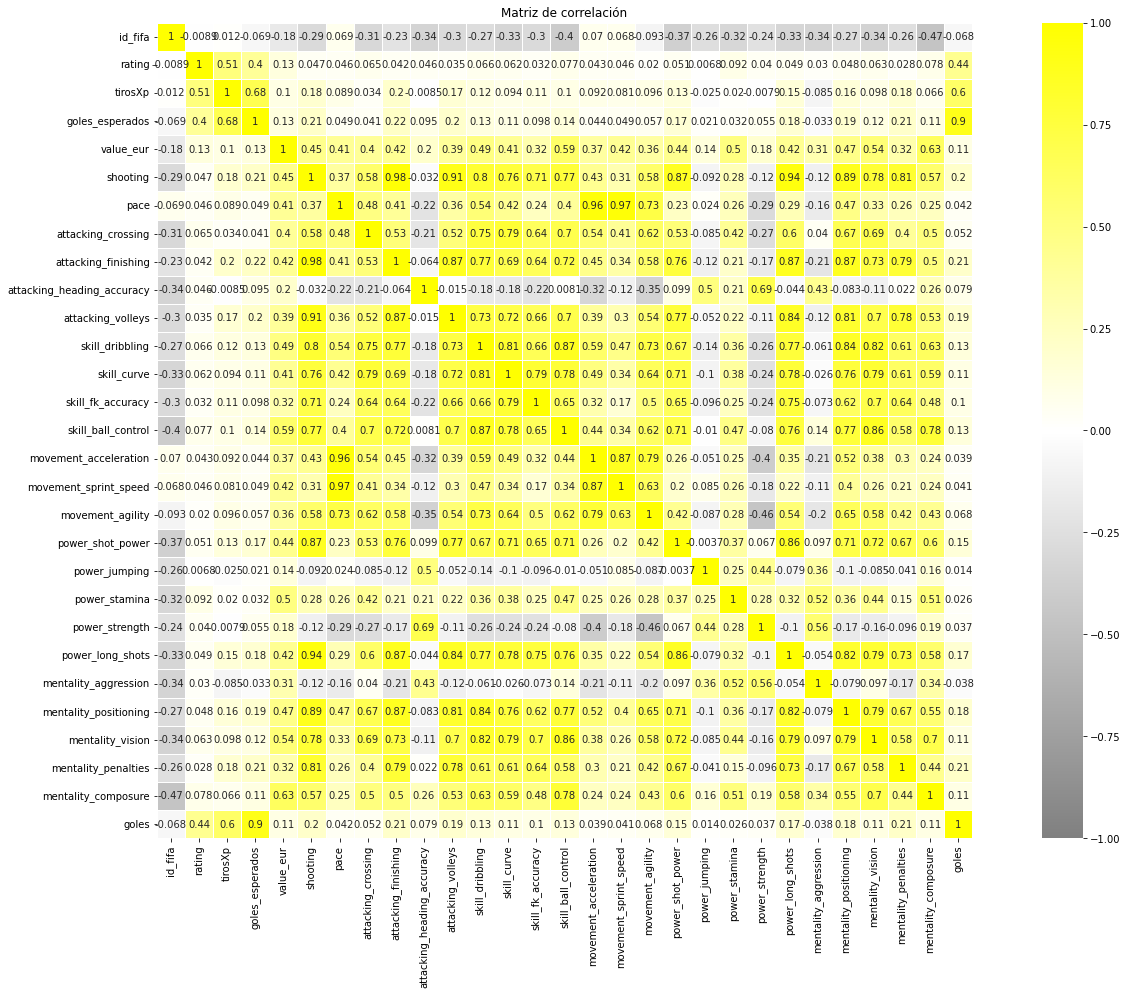

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Crear un colormap personalizado de amarillo a blanco a gris
custom_cmap = LinearSegmentedColormap.from_list('yellow_white_gray', ['gray', 'white', 'yellow'])

df_numeric = df_stats_fifa.select_dtypes(include=['number'])

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(25, 15))
sns.heatmap(df_numeric.corr(), annot=True, cmap=custom_cmap, square=True, cbar=True, linewidths=.5, vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

In [ ]:
df_stats_fifa.value_counts("goles")


goles
0     1581
1      458
2      217
3      101
4       55
5       32
6       24
7       12
8       12
10       5
11       5
12       3
9        2
17       2
16       2
14       1
13       1
18       1
27       1
Name: count, dtype: int64

In [135]:
from sklearn.model_selection import train_test_split

y = df_stats_fifa["goles"]
y_log = np.log1p(y)


# Dividir los datos en características (X) y objetivo transformado (y_log)
X = df_stats_fifa.drop(["goles","id_fifa","short_name"],axis=1)
y = y_log

# Dividir en entrenamiento y prueba, sin olvidar estratificar si es necesario
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape) 
print(X_test.shape)   
print(y_test.shape)



(2012, 27)
(2012,)
(503, 27)
(503,)


In [142]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Crear el pipeline con PCA y el modelo RandomForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de las características
    ('pca', PCA()),  # PCA
    ('rf', RandomForestRegressor(random_state=42))  # Random Forest
])

# Definir los hiperparámetros para GridSearch
param_grid = {
    'pca__n_components': [0.95, 0.90, 0.85],  # Proporción de varianza explicada por PCA
    'rf__n_estimators': [100, 200],  # Número de árboles en Random Forest
    'rf__max_depth': [10, 20, None],  # Profundidad máxima de los árboles
    'rf__min_samples_split': [2, 5],  # Mínimo número de muestras para dividir un nodo
}

# Realizar búsqueda en cuadrícula (GridSearch)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar el modelo optimizado
y_pred_log_optimized = grid_search.predict(X_test)
y_pred_optimized = np.expm1(y_pred_log_optimized)  # Revertir la transformación logarítmica

# Calcular MAE y R²
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("MAE optimizado:", mae_optimized)
print("R² optimizado:", r2_optimized)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores parámetros: {'pca__n_components': 0.95, 'rf__max_depth': 20, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
MAE optimizado: 0.4622216527577216
R² optimizado: -1.1941457637873607


In [ ]:
X_train.to_csv("../data/train/X_train_fifa.csv")
y_train.to_csv("../data/train/y_train_fifa.csv")
X_test.to_csv("../data/test/X_test_fifa.csv")
y_test.to_csv("../data/test/y_test_fifa.csv")

# Continuación

In [ ]:
# df_stats.corr(numeric_only=True)
df_stats.iloc[:,7:10].describe()
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3190 entries, 0 to 3485
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id_fifa              int64  
 1   nom_jugad            object 
 2   equipo               object 
 3   liga                 object 
 4   año                  int64  
 5   edad                 int64  
 6   apariciones_totales  int64  
 7   min_jugados          int64  
 8   tirosXp              float64
 9   pasesXp              float64
 10  regatesXp            float64
 11  faltadoXp            float64
 12  fuerajuegoXp         float64
 13  robadoXp             float64
 14  malcontroXp          float64
 15  goles_esperados      float64
 16  xGDiff               float64
 17  xG/90                float64
 18  total_disparos       int64  
 19  xG/Shots             float64
 20  rating               float64
 21  goles                int64  
 22  num_pos              int64  
dtypes: float64(12), int64(8), object(3)
memory 

In [ ]:
# df_to_show=df_stats.iloc[:,0:10].select_dtypes(include=['number'])

In [ ]:
df_stats = df_stats[['id_fifa','nom_jugad', 'num_pos', 'equipo', 'liga', 'edad',
       'apariciones_totales', 'min_jugados', 'tirosXp', 'pasesXp', 'regatesXp',
       'faltadoXp', 'fuerajuegoXp', 'robadoXp', 'malcontroXp',
       'goles_esperados', 'xGDiff', 'xG/90', 'total_disparos', 'xG/Shots',
       'rating','goles']]


In [ ]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3190 entries, 0 to 3485
Data columns (total 22 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id_fifa              int64  
 1   nom_jugad            object 
 2   num_pos              int64  
 3   equipo               object 
 4   liga                 object 
 5   edad                 int64  
 6   apariciones_totales  int64  
 7   min_jugados          int64  
 8   tirosXp              float64
 9   pasesXp              float64
 10  regatesXp            float64
 11  faltadoXp            float64
 12  fuerajuegoXp         float64
 13  robadoXp             float64
 14  malcontroXp          float64
 15  goles_esperados      float64
 16  xGDiff               float64
 17  xG/90                float64
 18  total_disparos       int64  
 19  xG/Shots             float64
 20  rating               float64
 21  goles                int64  
dtypes: float64(12), int64(7), object(3)
memory usage: 573.2+ KB


In [ ]:
# df_stats = df_stats[(df_stats["num_pos"]==4)|(df_stats["num_pos"]==3)]

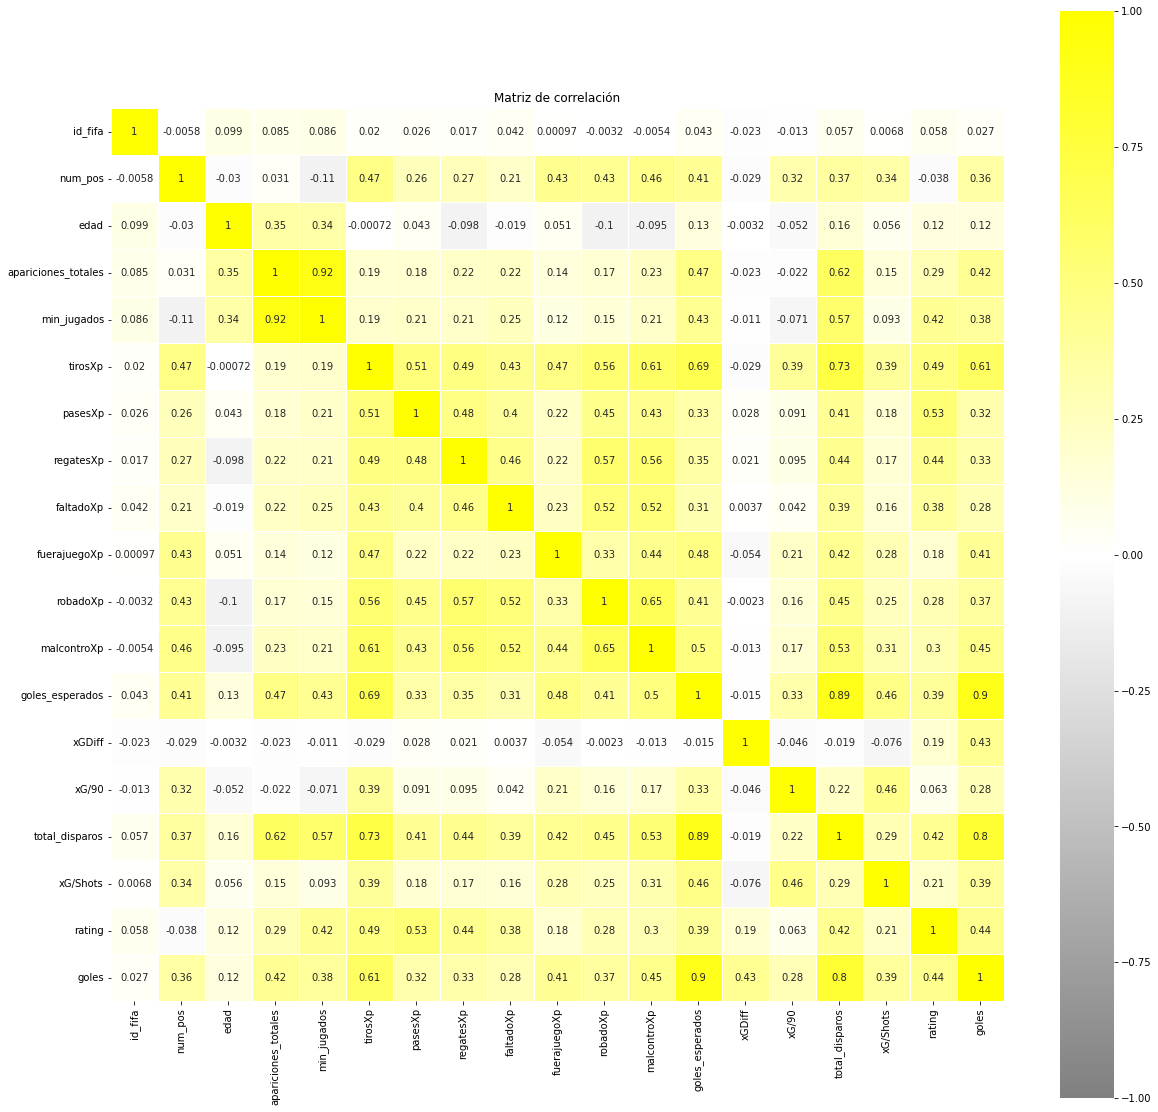

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap

# # Crear una paleta personalizada de amarillo a blanco a gris
# cmap = LinearSegmentedColormap.from_list("yellow_white_gray", ['gray', 'white', 'yellow'])

# # Filtrar solo columnas numéricas
# df_numeric = df_stats.select_dtypes(include=['number'])


# # Crear el heatmap solo con las columnas numéricas
# plt.figure(figsize=(10, 8))
# sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=True)

# # Mostrar el gráfico
# plt.title("Heatmap con solo columnas numéricas")
# plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Crear un colormap personalizado de amarillo a blanco a gris
custom_cmap = LinearSegmentedColormap.from_list('yellow_white_gray', ['gray', 'white', 'yellow'])

df_numeric = df_stats.select_dtypes(include=['number'])

# Crear el heatmap de la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(df_numeric.corr(), annot=True, cmap=custom_cmap, square=True, cbar=True, linewidths=.5, vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

In [ ]:
df_stats.to_csv('../data/processed/stats_processed.csv')

In [ ]:
df_stats.groupby("num_pos")["goles"].sum()

num_pos
0        0
2      259
5      815
10    1511
Name: goles, dtype: int64

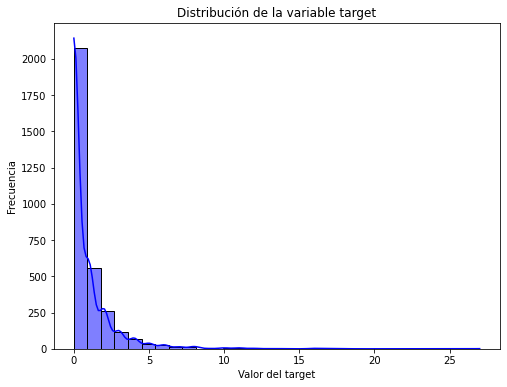

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu variable target se llama "target"
# Puedes ajustar el nombre según tu DataFrame

# Crear un histograma de la variable 'target'
plt.figure(figsize=(8,6))
sns.histplot(df_stats['goles'], kde=True, color='blue', bins=30)

# Mostrar título y etiquetas
plt.title('Distribución de la variable target')
plt.xlabel('Valor del target')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


In [ ]:
y = df_stats["goles"]
X = df_stats.drop(["goles","id_fifa"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)  
print(y_train.shape) 
print(X_test.shape)   
print(y_test.shape)   


(2552, 20)
(2552,)
(638, 20)
(638,)


In [ ]:
X_train.to_csv("../data/train/X_train.csv")
y_train.to_csv("../data/train/y_train.csv")
X_test.to_csv("../data/test/X_test.csv")
y_test.to_csv("../data/test/y_test.csv")

In [ ]:
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())